# Wheeled cat-catching robot (i.e., the "catbot")

## Derive equations of motion

Do imports.

In [1]:
import sympy as sym
import numpy as np
from IPython.display import display, Markdown
from sympy.physics import mechanics
mechanics.init_vprinting()

Define variables and constants as symbols.

In [2]:
# Time
t = sym.Symbol('t')

# Horizontal position of wheel axle
zeta = mechanics.dynamicsymbols('zeta', real=True)

# Angle of body from vertical (positive means leaning forward)
theta = mechanics.dynamicsymbols('theta', real=True)

# Torque applied by the body on the wheel
tau = sym.symbols('tau', real=True)

# Wheel parameters
#   m_w  mass
#   J_w  moment of inertia
#   r_w  radius
m_w, J_w, r_w = sym.symbols('m_w, J_w, r_w', real=True, positive=True)

# Body parameters
#   m_b  mass
#   J_b  moment of inertia (about center-of-mass)
#   r_b  distance between wheel axle and body center-of-mass
m_b, J_b, r_b = sym.symbols('m_b, J_b, r_b', real=True, positive=True)

# Acceleration of gravity
g = sym.symbols('g', real=True, positive=True)

Compute Lagrangian.

In [3]:
# Position of wheel and body
p_w = sym.Matrix([zeta, r_w])
p_b = sym.Matrix([zeta + r_b * sym.sin(theta), r_w + r_b * sym.cos(theta)])

# Linear velocity of wheel and body
v_w = p_w.diff(t)
v_b = p_b.diff(t)

# Angular velocity of wheel (assume rolling without slipping on flat ground) and body
omega_w = zeta.diff(t) / r_w
omega_b = theta.diff(t)

# Kinetic and potential energy
T = (m_w * v_w.dot(v_w) + m_b * v_b.dot(v_b) + J_w * omega_w**2 + J_b * omega_b**2) / 2
V = (m_w * p_w[1] * g) + (m_b * p_b[1] * g)

# Lagrangian
L = sym.Matrix([sym.simplify(T - V)])

Compute and show the matrices $M(q)$, $N(q, \dot{q})$, and $F(q)$ for which the equations of motion can be expressed as

$$ M(q) \ddot{q} + N(q, \dot{q}) = F(q) r $$

where

$$ q = \begin{bmatrix} \zeta \\ \theta \end{bmatrix} \qquad\text{and}\qquad r = \begin{bmatrix} \tau \end{bmatrix}. $$

In [4]:
# Generalized coordinates
q = sym.Matrix([zeta, theta])

# Generalized velocities
v = q.diff(t)

# Coefficients in the equations of motion
M = sym.simplify(L.jacobian(v).jacobian(v))
N = sym.simplify(L.jacobian(v).jacobian(q) @ v - L.jacobian(q).T)
F = sym.simplify(sym.Matrix([(zeta / r_w) - theta]).jacobian(q).T)

# Show results
display(Markdown(f'$$ M(q) = {mechanics.mlatex(M)} $$'))
display(Markdown(f'$$ N(q, \\dot{{q}}) = {mechanics.mlatex(N)} $$'))
display(Markdown(f'$$ F(q) = {mechanics.mlatex(F)} $$'))

$$ M(q) = \left[\begin{matrix}\frac{J_{w}}{r_{w}^{2}} + m_{b} + m_{w} & m_{b} r_{b} \cos{\left(\theta \right)}\\m_{b} r_{b} \cos{\left(\theta \right)} & J_{b} + m_{b} r_{b}^{2}\end{matrix}\right] $$

$$ N(q, \dot{q}) = \left[\begin{matrix}- m_{b} r_{b} \sin{\left(\theta \right)} \dot{\theta}^{2}\\- g m_{b} r_{b} \sin{\left(\theta \right)}\end{matrix}\right] $$

$$ F(q) = \left[\begin{matrix}\frac{1}{r_{w}}\\-1\end{matrix}\right] $$

Define and show the numerical value of constants (consistant with the URDF file).

In [ ]:
##########################################
# Temporary variables that can be ignored

# Dimensions of chassis
dx = 0.5
dy = 0.5
dz = 1.0

# Distance between axle and COM of chassis
h = 0.15

# Half-distance between wheels
a = 0.375

# Mass of chassis
mb = 12.

# MOI of chassis
Jbx = (mb / 12) * (dy**2 + dz**2)
Jby = (mb / 12) * (dx**2 + dz**2)
Jbz = (mb / 12) * (dx**2 + dy**2)

# Radius of each wheel
r = 0.5

# Width of each wheel
hw = 0.2

# Mass of each wheel
mw = 2.

# MOI of each wheel
Jw = (mw / 2) * r**2
Jwt = (mw / 12) * (3 * r**2 + hw**2)

# Total mass
m = mb + 2 * mw

# Total MOI
Jx = Jbx + 2 * Jwt
Jy = Jby
Jz = Jbz + 2 * Jwt

##########################################
# Parameters

# Define them
params = {
    r_w: r,
    m_w: 2 * mw,
    J_w: 2 * Jw,
    r_b: h,
    m_b: mb,
    J_b: Jby,
    g: 9.81,
}

# Show them
s = ''
for key, val in params.items():
    s += fr'{key} &= {mechanics.mlatex(val)} \\ '
s = s[:-3]
display(Markdown(fr'$$ \begin{{align*}}{s}\end{{align*}} $$'))

$$ \begin{align*}r_w &= 0.5 \\ m_w &= 4.0 \\ J_w &= 0.5 \\ r_b &= 0.15 \\ m_b &= 12.0 \\ J_b &= 1.25 \\ g &= 9.81 \end{align*} $$

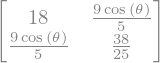

In [8]:
sym.nsimplify(M.subs(params), rational=True)

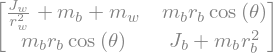

In [9]:
M

In [11]:
print(mechanics.mlatex(M))

\left[\begin{matrix}\frac{J_{w}}{r_{w}^{2}} + m_{b} + m_{w} & m_{b} r_{b} \cos{\left(\theta \right)}\\m_{b} r_{b} \cos{\left(\theta \right)} & J_{b} + m_{b} r_{b}^{2}\end{matrix}\right]


$$ \left[\begin{matrix}\frac{J_{w}}{r_{w}^{2}} + m_{b} + m_{w} & m_{b} r_{b} \cos{\left(\theta \right)}\\m_{b} r_{b} \cos{\left(\theta \right)} & J_{b} + m_{b} r_{b}^{2}\end{matrix}\right] $$

In [13]:
print(sym.latex(M))

\left[\begin{matrix}\frac{J_{w}}{r_{w}^{2}} + m_{b} + m_{w} & m_{b} r_{b} \cos{\left(\theta{\left(t \right)} \right)}\\m_{b} r_{b} \cos{\left(\theta{\left(t \right)} \right)} & J_{b} + m_{b} r_{b}^{2}\end{matrix}\right]


$$ \left[\begin{matrix}\frac{J_{w}}{r_{w}^{2}} + m_{b} + m_{w} & m_{b} r_{b} \cos{\left(\theta{\left(t \right)} \right)}\\m_{b} r_{b} \cos{\left(\theta{\left(t \right)} \right)} & J_{b} + m_{b} r_{b}^{2}\end{matrix}\right] $$

## Do simulations

Import modules and configure the notebook.

In [14]:
# These modules are part of other existing libraries
import numpy as np
import matplotlib.pyplot as plt

# This is my own script (it is an interface to the pybullet simulator)
import ae353_catbot

pybullet build time: May 17 2025 21:04:57


Create an instance of the `Simulator` class, which is an interface to the [pybullet](http://pybullet.org) simulation engine.

There are three optional arguments:

* `display` (`True` or `False`) is whether or not to show the simulation window;
* `sound` (`True` or `False`) is whether or not to play sounds;
* `launch_cat` (`True` or `False`) is whether or not to launch a cat.

In [15]:
simulator = ae353_catbot.Simulator(
    display=True,
    sound=False,
    launch_cat=True,
)

argv[0]=
You can open the visualizer by visiting the following URL:
http://127.0.0.1:7002/static/


Choose a camera view from the following options:
* `camera_sideview()`
* `camera_wideview()`
* `camera_topview()`
* `camera_catview()`

In [16]:
simulator.camera_sideview()

Define a controller that maps sensor measurements to actuator commands. By default, it chooses to apply zero torque to the wheels. Modify the `run` function to make the controller behave differently. This function will be called 100 times per second (i.e., at 100 Hz) by the simulator.

In [29]:
class Controller:
    def __init__(self, K):
        self.K = K
        print('__init__')
    
    def reset(self):
        print('reset')
    
    def run(
            self,
            t,
            wheel_position,
            wheel_velocity,
            pitch_angle,
            pitch_rate,
        ):

        print(f'run (t = {t:6.2})')
        
        x = np.array([
            wheel_position,
            wheel_velocity,
            pitch_angle,
            pitch_rate,
        ])
        u = - self.K @ x

        # FIXME: replace the following line
        wheel_torque = u[0]
        
        return wheel_torque

Create an instance of the controller.

In [31]:
controller = Controller(np.array([[1., 2., 3., 4.]]))

__init__


In [32]:
controller.run(0., 0., 0., 0., 0.)

run (t =    0.0)


Reset the simulator with given initial conditions (example).

In [33]:
simulator.reset(
    initial_conditions = {
        'wheel_position': 0.,
        'wheel_velocity': 0.,
        'pitch_angle': 0.,
        'pitch_rate': 0.,
    }
)

Reset the simulator with random initial conditions (example).

In [58]:
simulator.reset()

Reset the controller.

In [35]:
controller.reset()

reset


Run the simulator.

In [57]:
simulator.display_on()

In [59]:
data = simulator.run(
    controller,           # <-- required (an instance of your Controller class)
    maximum_time=1.,     # <-- optional (how long you want to run the simulation in seconds)
    data_filename=None,   # <-- optional (save data to this file, e.g., 'my_data.json')
    video_filename=None,  # <-- optional (save video to this file, e.g., 'my_video.mov')
)

run (t =    0.0)
run (t =   0.01)
run (t =   0.02)
run (t =   0.03)
run (t =   0.04)
run (t =   0.05)
run (t =   0.06)
run (t =   0.07)
run (t =   0.08)
run (t =   0.09)
run (t =    0.1)
run (t =   0.11)
run (t =   0.12)
run (t =   0.13)
run (t =   0.14)
run (t =   0.15)
run (t =   0.16)
run (t =   0.17)
run (t =   0.18)
run (t =   0.19)
run (t =    0.2)
run (t =   0.21)
run (t =   0.22)
run (t =   0.23)
run (t =   0.24)
run (t =   0.25)
run (t =   0.26)
run (t =   0.27)
run (t =   0.28)
run (t =   0.29)
run (t =    0.3)
run (t =   0.31)
run (t =   0.32)
run (t =   0.33)
run (t =   0.34)
run (t =   0.35)
run (t =   0.36)
run (t =   0.37)
run (t =   0.38)
run (t =   0.39)
run (t =    0.4)
run (t =   0.41)
run (t =   0.42)
run (t =   0.43)
run (t =   0.44)
run (t =   0.45)
run (t =   0.46)
run (t =   0.47)
run (t =   0.48)
run (t =   0.49)
run (t =    0.5)
run (t =   0.51)
run (t =   0.52)
run (t =   0.53)
run (t =   0.54)
run (t =   0.55)
run (t =   0.56)
run (t =   0.57)
run (t =   0.5

In [37]:
data

{'t': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
        0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
        0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
        0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
        0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
        0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
        0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
        0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
        0.99, 1.  ]),
 'wheel_position': array([-0.7733817 , -0.77286572, -0.77217505, -0.77148256, -0.77078882,
        -0.77009436, -0.76939971, -0.76870539, -0.76801193, -0.76731988,
        -0.76662983, -0.7659424 , -0.76525822, -0.76457799, -0.76390246,
        -0.7632324 , -0.76256868, -0.76191218, -0.76126389, -0.7606248

In [38]:
data.keys()

dict_keys(['t', 'wheel_position', 'wheel_velocity', 'pitch_angle', 'pitch_rate', 'cat_target', 'wheel_torque', 'wheel_torque_command'])

In [39]:
data['pitch_angle']

array([0.06053261, 0.0602919 , 0.06008657, 0.05992322, 0.05980553,
       0.05973678, 0.05972005, 0.05975838, 0.05985477, 0.06001237,
       0.06023445, 0.06052447, 0.06088613, 0.0613234 , 0.06184055,
       0.06244218, 0.06313324, 0.06391901, 0.06480531, 0.06579836,
       0.06690483, 0.06813195, 0.06948745, 0.0709797 , 0.07261768,
       0.07441105, 0.07637022, 0.07850636, 0.08083148, 0.08335847,
       0.08610121, 0.08907456, 0.0922945 , 0.09577817, 0.09954395,
       0.10361158, 0.10800221, 0.1127385 , 0.11784477, 0.12334704,
       0.12927319, 0.13565306, 0.14251861, 0.14990399, 0.15784568,
       0.16638271, 0.17555677, 0.1854123 , 0.19599672, 0.2073605 ,
       0.21955736, 0.23264439, 0.24668218, 0.26173497, 0.27787071,
       0.29516115, 0.31367387, 0.33345026, 0.35451852, 0.3769076 ,
       0.40064704, 0.42576675, 0.45229683, 0.48026738, 0.5097083 ,
       0.54064908, 0.57311863, 0.60714509, 0.6427557 , 0.6799767 ,
       0.71883325, 0.75934946, 0.80154833, 0.84545202, 0.89108

In [45]:
i = int(np.argwhere(np.abs(data['pitch_angle']) > 0.2).flatten()[0])

In [46]:
data['t'][i]

In [49]:
data['wheel_velocity'][i]

Check if a cat was saved.

In [ ]:
did_save_cat = simulator.did_save_cat()
if did_save_cat:
    print(f'A cat was saved!')
else:
    print(f'No cat was saved.')

Get, show, and save a snapshot of the simulation after the last time step.

In [ ]:
# Get snapshot as height x width x 4 numpy array of RGBA values
rgba = simulator.snapshot()

# Display snapshot
plt.figure(figsize=(8, 8))
plt.imshow(rgba)

# Save snapshot
plt.imsave('my_snapshot.png', rgba)

Plot the results.

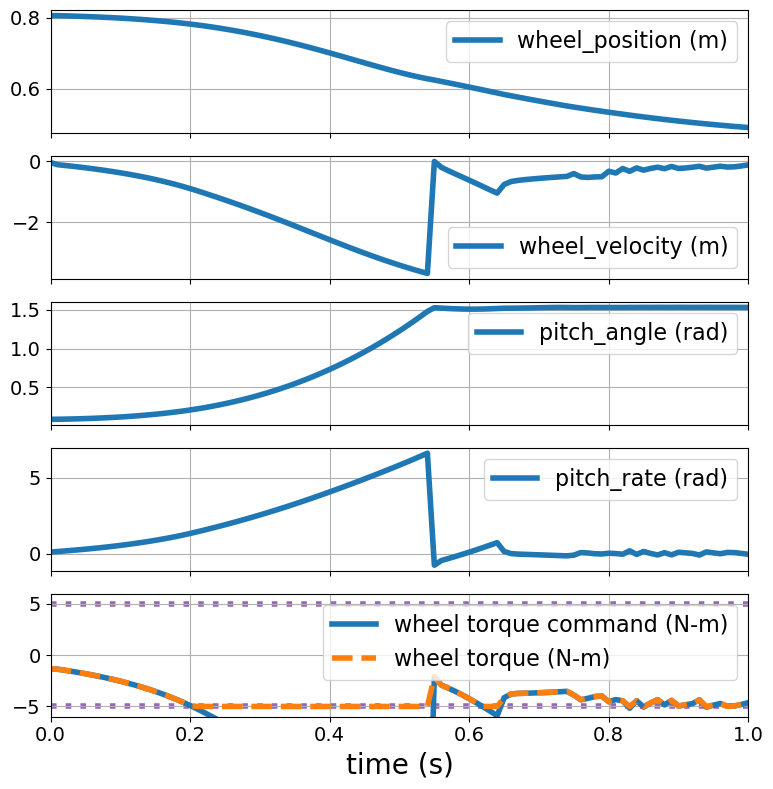

In [60]:
# Create a figure with five subplots, all of which share the same x-axis
fig, (
    ax_wheel_position,
    ax_wheel_velocity,
    ax_pitch_angle,
    ax_pitch_rate,
    ax_wheel_torque,
) = plt.subplots(5, 1, figsize=(8, 8), sharex=True)

# Plot wheel position
ax_wheel_position.plot(
    data['t'], data['wheel_position'],
    label='wheel_position (m)', linewidth=4,
)
ax_wheel_position.grid()
ax_wheel_position.legend(fontsize=16)
ax_wheel_position.tick_params(labelsize=14)

# Plot wheel velocity
ax_wheel_velocity.plot(
    data['t'], data['wheel_velocity'],
    label='wheel_velocity (m)', linewidth=4,
)
ax_wheel_velocity.grid()
ax_wheel_velocity.legend(fontsize=16)
ax_wheel_velocity.tick_params(labelsize=14)

# Plot pitch angle
ax_pitch_angle.plot(
    data['t'], data['pitch_angle'],
    label='pitch_angle (rad)', linewidth=4,
)
ax_pitch_angle.grid()
ax_pitch_angle.legend(fontsize=16)
ax_pitch_angle.tick_params(labelsize=14)

# Plot pitch rate
ax_pitch_rate.plot(
    data['t'], data['pitch_rate'],
    label='pitch_rate (rad)', linewidth=4,
)
ax_pitch_rate.grid()
ax_pitch_rate.legend(fontsize=16)
ax_pitch_rate.tick_params(labelsize=14)

# Plot wheel torque
ax_wheel_torque.plot(
    data['t'], data['wheel_torque_command'],
    label='wheel torque command (N-m)', linewidth=4,
)
ax_wheel_torque.plot(
    data['t'], data['wheel_torque'],
    '--', label='wheel torque (N-m)', linewidth=4,
)
ax_wheel_torque.plot(
    data['t'], -np.ones_like(data['t']) * simulator.maximum_wheel_torque,
    ':', linewidth=4, color='C4', zorder=0,
)
ax_wheel_torque.plot(
    data['t'], np.ones_like(data['t']) * simulator.maximum_wheel_torque,
    ':', linewidth=4, color='C4', zorder=0,
)
ax_wheel_torque.grid()
ax_wheel_torque.legend(fontsize=16)
ax_wheel_torque.tick_params(labelsize=14)
ax_wheel_torque.set_ylim(
    -1.2 * simulator.maximum_wheel_torque,
    1.2 * simulator.maximum_wheel_torque,
)

# Set x-axis properties (only need to do this on the last
# subplot since all subplots share the same x-axis)
ax_wheel_torque.set_xlabel('time (s)', fontsize=20)
ax_wheel_torque.set_xlim([data['t'][0], data['t'][-1]])

# Make the arrangement of subplots look nice
fig.tight_layout()

Save the figure (without transparent background).

In [61]:
fig.savefig('my_figure.png', facecolor='white', transparent=False)

In [63]:
fig.savefig('../my_figure.pdf', facecolor='white', transparent=False)